In [191]:
import pandas as pd

In [192]:
corona_df = pd.read_csv('C:/ubion/060822/csv/corona.csv')
corona_df = corona_df.sort_values('createDt', ascending=True)
corona_df.reset_index(drop=True, inplace=True)
corona_df.drop(['Unnamed: 0'], axis=1, inplace=True)
corona_df.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


In [193]:
corona_df.isna().sum()

createDt        0
deathCnt        0
decideCnt       0
seq             0
stateDt         0
stateTime       0
updateDt        3
accExamCnt    128
accDefRate    197
dtype: int64

In [194]:
corona_df.describe()

,deathCnt,decideCnt,seq,stateDt,accExamCnt,accDefRate
count,820.000000,8.200000e+02,820.000000,8.200000e+02,6.920000e+02,623.000000
mean,3927.832927,1.913097e+06,472.393902,2.020897e+07,7.545057e+06,1.556435
std,6164.310693,4.857030e+06,249.701095,7.118265e+03,6.172020e+06,0.543014
min,54.000000,7.513000e+03,51.000000,2.020031e+07,2.101440e+05,0.902205
25%,415.750000,2.393525e+04,256.750000,2.020100e+07,1.934309e+06,1.078089
50%,1812.500000,1.185640e+05,461.500000,2.021042e+07,6.368310e+06,1.416159
75%,3120.500000,3.979915e+05,698.250000,2.021112e+07,1.216890e+07,1.816009
max,24305.000000,1.818820e+07,904.000000,2.022061e+07,2.151807e+07,3.919308


In [195]:
corona_df.columns = ['등록일시', '사망자', '확진자', '게시글번호', '기준일',
                     '기준시간', '수정일시', '누적의심자', '누적확진률']

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


### decribe() 함수에서 요약 정보
1. count : 컬럼별 데이터의 개수
2. mean : 컬럼별 데이터의 평균 값
3. std : 컬럼별 데이터의 표준편차
4. min : 컬럼별 데이터의 최소값
5. max : 컬럼별 데이터의 최대값
6. 25%, 50%, 75% : 컬럼별 백분위수의 각 지정의 값, 분포를 반영해서 평균을 보완하는 목적으로 사용

In [196]:
## 일일 확진자 라는 파생변수를 생성
## 컬럼의 당일 확진자의 수 - 전일 확진자의 수 = 일일 확진자의 수
corona_df['일일확진자'] = (corona_df['확진자'] - corona_df['확진자'].shift())

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0


### shift()
1. shift(n) -> n을 공란으로 두면 기본값이 1 = 인덱스가 1 아래인 값을 뜻한다. 
2. n의 값이 존재하면 n 값만큼 인덱스를 이동하여 그 행의 값을 가지고 온다.
### diff()
1. 한 객체 내에서 열과 열/행과 행의 차이를 출력

In [197]:
## 일일 확진자 파생변수 생성 완료
## 일일 사망자 파생변수를 만들어 봅시다.

corona_df['일일사망자'] = corona_df['사망자'].diff()

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [198]:
corona_df.drop(['일일확진자', '일일사망자'], axis=1, inplace=True)

In [199]:
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000


### fillna()
1. NaN이라는 값에 ()안에 들어가는 값으로 대체를 한다.
2. method 속성 ffill, bfill -> f,b -> f = front // b = back
3. ffill -> 앞의 값으로 대체 / bfill -> 뒤의 값으로 대체

In [200]:
corona_df["일일확진자"] = (corona_df["확진자"] - corona_df["확진자"].shift()).fillna(0)

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0


In [201]:
corona_df["일일사망자"] = corona_df["사망자"].diff().fillna(0)

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [202]:
corona_df["일일확진자"].describe()

count       820.000000
mean      22171.569512
std       71013.854189
min        -430.000000
25%         125.000000
50%         642.500000
75%        2782.750000
max      621204.000000
Name: 일일확진자, dtype: float64

In [203]:
corona_df["일일사망자"].describe()

count    820.000000
mean      29.574390
std       68.530863
min       -2.000000
25%        2.000000
50%        5.000000
75%       20.000000
max      469.000000
Name: 일일사망자, dtype: float64

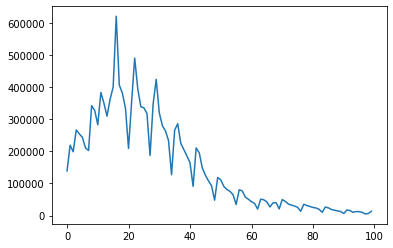

In [204]:
import matplotlib.pyplot as plt

decide_cnt = corona_df.tail(100)["일일확진자"].values.tolist()

plt.plot(decide_cnt)
plt.show()

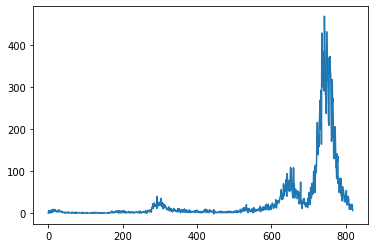

In [205]:
death_cnt = corona_df["일일사망자"].values.tolist()

plt.plot(death_cnt)
plt.show()

In [206]:
corona_df.tail()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0
819,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN,13358.0,6.0


In [207]:
corona_df.fillna(method='ffill').tail(20)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
800,2022-05-20 09:02:54.987,23885,17914882,885,20220520,00:00,2022-05-27 09:04:41.621,21518073.0,2.787908,25113.0,43.0
801,2022-05-21 08:39:51.786,23911,17938332,886,20220521,00:00,2022-05-28 09:10:27.211,21518073.0,2.787908,23450.0,26.0
802,2022-05-22 07:52:40.527,23965,17957621,887,20220522,00:00,2022-05-28 09:10:20.33,21518073.0,2.787908,19289.0,54.0
803,2022-05-23 08:56:56.412,23987,17967592,888,20220523,00:00,2022-05-28 09:10:13.674,21518073.0,2.787908,9971.0,22.0
804,2022-05-24 08:49:38.261,24006,17993923,889,20220524,00:00,2022-05-31 08:58:44.451,21518073.0,2.787908,26331.0,19.0
805,2022-05-25 09:02:44.294,24029,18017859,890,20220525,00:00,2022-06-01 09:08:25.254,21518073.0,2.787908,23936.0,23.0
806,2022-05-26 09:13:37.732,24063,18036664,891,20220526,00:00,2022-06-01 09:08:19.164,21518073.0,2.787908,18805.0,34.0
807,2022-05-27 09:03:34.444,24103,18053236,892,20220527,00:00,2022-06-03 09:11:10.578,21518073.0,2.787908,16572.0,40.0
808,2022-05-28 09:09:18.909,24139,18067610,893,20220528,00:00,2022-06-04 09:00:06.316,21518073.0,2.787908,14374.0,36.0
809,2022-05-29 09:05:28.382,24158,18080257,894,20220529,00:00,2022-06-04 08:59:51.863,21518073.0,2.787908,12647.0,19.0


In [208]:
corona_df.fillna(method='bfill').tail(20)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
800,2022-05-20 09:02:54.987,23885,17914882,885,20220520,00:00,2022-05-27 09:04:41.621,NaN,NaN,25113.0,43.0
801,2022-05-21 08:39:51.786,23911,17938332,886,20220521,00:00,2022-05-28 09:10:27.211,NaN,NaN,23450.0,26.0
802,2022-05-22 07:52:40.527,23965,17957621,887,20220522,00:00,2022-05-28 09:10:20.33,NaN,NaN,19289.0,54.0
803,2022-05-23 08:56:56.412,23987,17967592,888,20220523,00:00,2022-05-28 09:10:13.674,NaN,NaN,9971.0,22.0
804,2022-05-24 08:49:38.261,24006,17993923,889,20220524,00:00,2022-05-31 08:58:44.451,NaN,NaN,26331.0,19.0
805,2022-05-25 09:02:44.294,24029,18017859,890,20220525,00:00,2022-06-01 09:08:25.254,NaN,NaN,23936.0,23.0
806,2022-05-26 09:13:37.732,24063,18036664,891,20220526,00:00,2022-06-01 09:08:19.164,NaN,NaN,18805.0,34.0
807,2022-05-27 09:03:34.444,24103,18053236,892,20220527,00:00,2022-06-03 09:11:10.578,NaN,NaN,16572.0,40.0
808,2022-05-28 09:09:18.909,24139,18067610,893,20220528,00:00,2022-06-04 09:00:06.316,NaN,NaN,14374.0,36.0
809,2022-05-29 09:05:28.382,24158,18080257,894,20220529,00:00,2022-06-04 08:59:51.863,NaN,NaN,12647.0,19.0


In [209]:
corona_df["누적의심자"].fillna(corona_df["누적의심자"].max())

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [210]:
corona_df["누적확진률"].fillna(corona_df["누적확진률"].mean())

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [211]:
corona_df.query("일일확진자 < 0")   ## 일일확진자 컬럼의 값들 중 0보다 작은 값

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [212]:
corona_df.query("일일사망자 < 0")

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [213]:
corona_df.loc[444:448, :]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


### apply()
1. 컬럼에 있는 각 원소들에 연산을 해주는 함수

In [214]:
corona_df["누적확진률"].describe()

count    623.000000
mean       1.556435
std        0.543014
min        0.902205
25%        1.078089
50%        1.416159
75%        1.816009
max        3.919308
Name: 누적확진률, dtype: float64

### lambda()
1. lambda 매개변수 : 표현식

In [215]:
corona_df["H/L"] = corona_df["누적확진률"].apply(
                                    lambda x : "High" if (x > 1.556) else "Low")

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [216]:
def H_and_L(x):
    if x > 1.556:
        return "High"
    else:
        return "Low"

corona_df["H/L"] = corona_df["누적확진률"].apply(H_and_L)


In [217]:
corona_df["H/L"].value_counts()

Low     617
High    203
Name: H/L, dtype: int64

In [218]:
## apply 함수를 이용해서 '일일확진자' 값중 음수인 값에 NaN으로 대체
import numpy as np

In [219]:
corona_df["일일확진자"] = corona_df["일일확진자"].apply(lambda x : np.NaN if (x < 0) else x)

In [220]:
corona_df.loc[corona_df["일일확진자"].isna()]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,NaN,-2.0,Low


In [221]:
## 등록일시 -> string --> 시계열 데이터
corona_df["등록일시"] = pd.to_datetime(corona_df["등록일시"])

corona_df["등록일시"]

0     2020-03-10 00:00:00.000
1     2020-03-11 00:00:00.000
2     2020-03-12 00:00:00.000
3     2020-03-13 00:00:00.000
4     2020-03-14 00:00:00.000
                ...          
815   2022-06-04 08:56:49.219
816   2022-06-05 08:53:19.426
817   2022-06-06 09:00:06.734
818   2022-06-07 09:09:00.897
819   2022-06-08 09:09:05.982
Name: 등록일시, Length: 820, dtype: datetime64[ns]

In [222]:
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High


In [223]:
corona_df["요일"] = corona_df["등록일시"].dt.weekday
corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


1. '요일' 컬럼의 값을 apply 함수를 사용해서 숫자형태를 문자 형태 월, ..., 일로 표기를 바꿔보시오

In [224]:
def change_day(x):
    if x == 0:
        return "월"
    elif x== 1:
        return "화"
    elif x== 2:
        return "수"
    elif x== 3:
        return "목"
    elif x== 4:
        return "금"
    elif x== 5:
        return "토"
    elif x == 6:
        return "일"
    else:
        return np.NaN
    


In [225]:
corona_df["요일"] = corona_df["요일"].apply(change_day)

corona_df.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,화
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,수
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,목
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,금
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,토


In [232]:
## 요일이라는 파생변수를 통해서
## 요일별 확진자의 평균을 구해서 시각화

mean_corona = corona_df.groupby("요일").mean()
mean_corona

,사망자,확진자,게시글번호,기준일,누적의심자,누적확진률,일일확진자,일일사망자
요일,,,,,,,,
금,3875.923077,1.874167e+06,470.940171,2.020893e+07,7.541537e+06,1.551521,22542.854701,32.897436
목,3873.922414,1.867492e+06,472.991379,2.020893e+07,7.576033e+06,1.554854,25776.267241,34.206897
수,3982.805085,1.964730e+06,472.627119,2.020895e+07,7.472065e+06,1.558561,26994.550847,28.152542
월,3978.267241,1.947711e+06,473.750000,2.020901e+07,7.594898e+06,1.554308,14862.586207,24.267241
일,3920.169492,1.902463e+06,473.161017,2.020903e+07,7.618305e+06,1.550999,20805.059829,28.262712
토,3908.427350,1.896723e+06,471.940171,2.020901e+07,7.575484e+06,1.549285,22555.948718,32.504274
화,3954.652542,1.937736e+06,471.364407,2.020895e+07,7.437156e+06,1.575322,21787.296610,26.771186


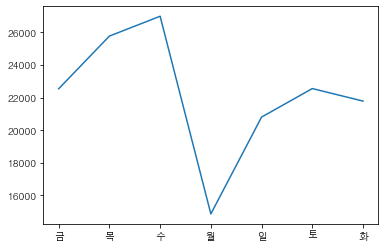

In [231]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname= font_path).get_name()
rc('font', family=font)

y = mean_corona["일일확진자"].to_list()
x = mean_corona.index

plt.plot(x, y)
plt.show()

In [ ]:
pip install yfinance

In [235]:
import yfinance as yf

In [236]:
yf.download('AAPL', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.177795,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.221363,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.414242,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.883354,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.803490,219111200
...,...,...,...,...,...,...
2022-06-02,147.830002,151.270004,146.860001,151.210007,151.210007,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,145.380005,88471400
2022-06-06,147.029999,148.570007,144.899994,146.139999,146.139999,71598400


In [237]:
data = yf.download(["AAPL", "TSLA", "AMZN", "CPNG"], start="2019-01-01")
data

[*********************100%***********************]  4 of 4 completed


Adj Close                                      Close              \
                  AAPL        AMZN   CPNG        TSLA        AAPL        AMZN   
Date                                                                            
2018-12-31   38.177803   75.098503    NaN   66.559998   39.435001   75.098503   
2019-01-02   38.221371   76.956497    NaN   62.023998   39.480000   76.956497   
2019-01-03   34.414238   75.014000    NaN   60.071999   35.547501   75.014000   
2019-01-04   35.883354   78.769501    NaN   63.537998   37.064999   78.769501   
2019-01-07   35.803486   81.475502    NaN   66.991997   36.982498   81.475502   
...                ...         ...    ...         ...         ...         ...   
2022-06-02  151.210007  125.511002  13.18  775.000000  151.210007  125.511002   
2022-06-03  145.380005  122.349998  12.64  703.549988  145.380005  122.349998   
2022-06-06  146.139999  124.790001  12.79  714.840027  146.139999  124.790001   
2022-06-07  148.710007  123.000000  12.16  716.659973  148.710007  123.000000   
2022-06-08  147.960007  121.180000  12.95  725.599976  147.960007  121.180000   

                                     High              ...     Low  \
             CPNG        TSLA        AAPL        AMZN  ...    CPNG   
Date                                                   ...           
2018-12-31    NaN   66.559998   39.840000   76.038002  ...     NaN   
2019-01-02    NaN   62.023998   39.712502   77.667999  ...     NaN   
2019-01-03    NaN   60.071999   36.430000   76.900002  ...     NaN   
2019-01-04    NaN   63.537998   37.137501   79.699997  ...     NaN   
2019-01-07    NaN   66.991997   37.207500   81.727997  ...     NaN   
...           ...         ...         ...         ...  ...     ...   
2022-06-02  13.18  775.000000  151.270004  125.610001  ...  12.745   
2022-06-03  12.64  703.549988  147.970001  124.400002  ...  12.200   
2022-06-06  12.79  714.840027  148.570007  128.990005  ...  12.605   
2022-06-07  12.16  716.659973  149.000000  124.099998  ...  12.010   
2022-06-08  12.95  725.599976  149.869995  123.750000  ...  12.140   

                              Open                                    Volume  \
                  TSLA        AAPL        AMZN   CPNG        TSLA       AAPL   
Date                                                                           
2018-12-31   65.052002   39.632500   75.540001    NaN   67.557999  140014000   
2019-01-02   59.759998   38.722500   73.260002    NaN   61.220001  148158800   
2019-01-03   59.476002   35.994999   76.000504    NaN   61.400002  365248800   
2019-01-04   60.546001   36.132500   76.500000    NaN   61.200001  234428400   
2019-01-07   63.549999   37.174999   80.115501    NaN   64.344002  219111200   
...                ...         ...         ...    ...         ...        ...   
2022-06-02  726.200012  147.830002  121.683998  12.85  732.469971   72348100   
2022-06-03  700.250000  146.899994  124.199997  12.96  729.679993   88471400   
2022-06-06  703.049988  147.029999  125.250000  12.99  733.059998   71598400   
2022-06-07  690.280029  144.350006  122.010002  12.51  702.000000   67808200   
2022-06-08  717.530029  148.580002  122.610001  12.20  720.260010   53895900   

                                             
                 AMZN        CPNG      TSLA  
Date                                         
2018-12-31  139090000         NaN  31511500  
2019-01-02  159662000         NaN  58293000  
2019-01-03  139512000         NaN  34826000  
2019-01-04  183652000         NaN  36970500  
2019-01-07  159864000         NaN  37756000  
...               ...         ...       ...  
2022-06-02  100560000   7429900.0  31157700  
2022-06-03   97604000   8640300.0  37348100  
2022-06-06  135269000   6036600.0  28068200  
2022-06-07   85156700  11478500.0  24269500  
2022-06-08   64828200   8159300.0  25339600  

[867 rows x 24 columns]

In [238]:
data['Close']

,AAPL,AMZN,CPNG,TSLA
Date,,,,
2018-12-31,39.435001,75.098503,NaN,66.559998
2019-01-02,39.480000,76.956497,NaN,62.023998
2019-01-03,35.547501,75.014000,NaN,60.071999
2019-01-04,37.064999,78.769501,NaN,63.537998
2019-01-07,36.982498,81.475502,NaN,66.991997
...,...,...,...,...
2022-06-02,151.210007,125.511002,13.18,775.000000
2022-06-03,145.380005,122.349998,12.64,703.549988
2022-06-06,146.139999,124.790001,12.79,714.840027


In [ ]:
aapl = yf.Ticker('AAPL')
aapl.info

In [ ]:
aapl.history(period='max')

### 본인들이 원하는 주식의 정보 1개 가지고와서 작업 (데이터의 개수는 1000개)
1. 컬럼의 이름을 open, close, high, low 소수점 2번 자리까지 반올림
2. NaN 값이 존재하면 시가로 대체
3. 파생변수 생성 -> 등락폭(종가 - 시가)을 삽입
4. 파생변수 생성 -> 등락률(등락폭 / 시가 * 100)을 삽입
5. 시가 / 종가 / 등락폭 / 볼륨 plot 그래프 -> subplot 사용해서 시각화

In [ ]:
tgt = yf.Ticker('tgt')
tgt.history(period='max')

In [270]:
yf_tgt = yf.download('TGT')
tgt = yf_tgt.tail(1000)
tgt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-20,77.160004,77.239998,74.500000,75.389999,68.932800,5147600
2018-06-21,75.389999,77.230003,75.239998,76.139999,69.618561,4261000
2018-06-22,76.730003,76.870003,75.580002,76.040001,69.527145,3254500
2018-06-25,76.120003,77.150002,76.089996,76.839996,70.258621,6191500
2018-06-26,76.650002,77.080002,76.239998,76.330002,69.792297,3575900
...,...,...,...,...,...,...
2022-06-02,156.559998,161.059998,156.080002,160.910004,160.910004,4366000
2022-06-03,159.190002,162.860001,159.000000,161.039993,161.039993,4185900
2022-06-06,161.399994,162.050003,158.750000,159.669998,159.669998,3772300


In [271]:
tgt = tgt.drop(["Adj Close"], axis=1)
tgt

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-20,77.160004,77.239998,74.500000,75.389999,5147600
2018-06-21,75.389999,77.230003,75.239998,76.139999,4261000
2018-06-22,76.730003,76.870003,75.580002,76.040001,3254500
2018-06-25,76.120003,77.150002,76.089996,76.839996,6191500
2018-06-26,76.650002,77.080002,76.239998,76.330002,3575900
...,...,...,...,...,...
2022-06-02,156.559998,161.059998,156.080002,160.910004,4366000
2022-06-03,159.190002,162.860001,159.000000,161.039993,4185900
2022-06-06,161.399994,162.050003,158.750000,159.669998,3772300


In [272]:
# 소수점 2자리까지 반올림

tgt = tgt[['Open', 'High', 'Low', 'Close', 'Volume']].round(2)
tgt.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-02,156.56,161.06,156.08,160.91,4366000
2022-06-03,159.19,162.86,159.00,161.04,4185900
2022-06-06,161.40,162.05,158.75,159.67,3772300
2022-06-07,148.00,157.95,147.15,155.98,33299700
2022-06-08,154.43,159.63,153.35,156.70,6567300


In [274]:
# 결측치 확인
# 2. NaN 값이 존재하면 시가로 대체

tgt.isna().sum()    # 결측치 없음


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [275]:
# 컬럼명 변경

tgt.columns = ["시가", "고가", "저가", "종가", "거래량"]
tgt.head()

tgt.fillna(tgt["시가"])

,시가,고가,저가,종가,거래량
Date,,,,,
2018-06-20,77.16,77.24,74.50,75.39,5147600
2018-06-21,75.39,77.23,75.24,76.14,4261000
2018-06-22,76.73,76.87,75.58,76.04,3254500
2018-06-25,76.12,77.15,76.09,76.84,6191500
2018-06-26,76.65,77.08,76.24,76.33,3575900
...,...,...,...,...,...
2022-06-02,156.56,161.06,156.08,160.91,4366000
2022-06-03,159.19,162.86,159.00,161.04,4185900
2022-06-06,161.40,162.05,158.75,159.67,3772300


In [276]:
# 3. 파생변수 생성 -> 등락폭(종가 - 시가)을 삽입

tgt["등락폭"] = tgt["종가"] - tgt["시가"]
tgt.tail()

,시가,고가,저가,종가,거래량,등락폭
Date,,,,,,
2022-06-02,156.56,161.06,156.08,160.91,4366000,4.35
2022-06-03,159.19,162.86,159.00,161.04,4185900,1.85
2022-06-06,161.40,162.05,158.75,159.67,3772300,-1.73
2022-06-07,148.00,157.95,147.15,155.98,33299700,7.98
2022-06-08,154.43,159.63,153.35,156.70,6567300,2.27


In [277]:
# 4. 파생변수 생성 -> 등락률(등락폭 / 시가 * 100)을 삽입

tgt["등락율"] = (tgt["등락폭"] / tgt["시가"]) * 100
tgt.tail()

,시가,고가,저가,종가,거래량,등락폭,등락율
Date,,,,,,,
2022-06-02,156.56,161.06,156.08,160.91,4366000,4.35,2.778487
2022-06-03,159.19,162.86,159.00,161.04,4185900,1.85,1.162133
2022-06-06,161.40,162.05,158.75,159.67,3772300,-1.73,-1.071871
2022-06-07,148.00,157.95,147.15,155.98,33299700,7.98,5.391892
2022-06-08,154.43,159.63,153.35,156.70,6567300,2.27,1.469922


In [278]:
# 등락율 2자리수까지 반올림

tgt["등락율"] = tgt["등락율"].round(2)
tgt.tail()

,시가,고가,저가,종가,거래량,등락폭,등락율
Date,,,,,,,
2022-06-02,156.56,161.06,156.08,160.91,4366000,4.35,2.78
2022-06-03,159.19,162.86,159.00,161.04,4185900,1.85,1.16
2022-06-06,161.40,162.05,158.75,159.67,3772300,-1.73,-1.07
2022-06-07,148.00,157.95,147.15,155.98,33299700,7.98,5.39
2022-06-08,154.43,159.63,153.35,156.70,6567300,2.27,1.47


In [279]:
data_1 = tgt["시가"].to_list()
data_2 = tgt["종가"].to_list()
data_3 = tgt["등락폭"].to_list()
data_4 = tgt["거래량"].to_list()

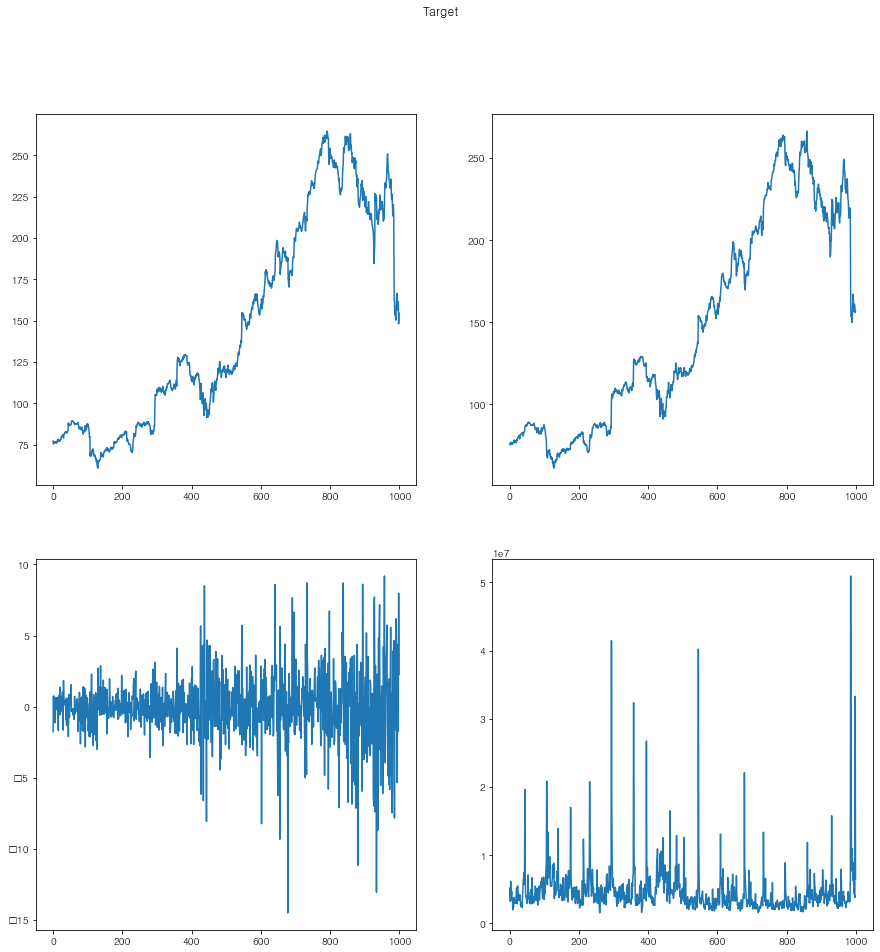

In [285]:
# 5. 시가 / 종가 / 등락폭 / 거래량 plot 그래프 -> subplot 사용해서 시각화

fig = plt.figure(figsize=(15,15))
fig.suptitle("Target")

plt.subplot(2,2,1)
plt.plot(data_1)

plt.subplot(2,2,2)
plt.plot(data_2)

plt.subplot(2,2,3)
plt.plot(data_3)

plt.subplot(2,2,4)
plt.plot(data_4)

plt.show()


In [281]:
tgt

,시가,고가,저가,종가,거래량,등락폭,등락율
Date,,,,,,,
2018-06-20,77.16,77.24,74.50,75.39,5147600,-1.77,-2.29
2018-06-21,75.39,77.23,75.24,76.14,4261000,0.75,0.99
2018-06-22,76.73,76.87,75.58,76.04,3254500,-0.69,-0.90
2018-06-25,76.12,77.15,76.09,76.84,6191500,0.72,0.95
2018-06-26,76.65,77.08,76.24,76.33,3575900,-0.32,-0.42
...,...,...,...,...,...,...,...
2022-06-02,156.56,161.06,156.08,160.91,4366000,4.35,2.78
2022-06-03,159.19,162.86,159.00,161.04,4185900,1.85,1.16
2022-06-06,161.40,162.05,158.75,159.67,3772300,-1.73,-1.07
